<a href="https://colab.research.google.com/github/Dexne/Pattern_Recognition/blob/main/04_Escalar_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reconocimiento de patrones**

Escalar datos estructurados

In [1]:
# importamos paqueteria
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Cargamos conjunto de datos

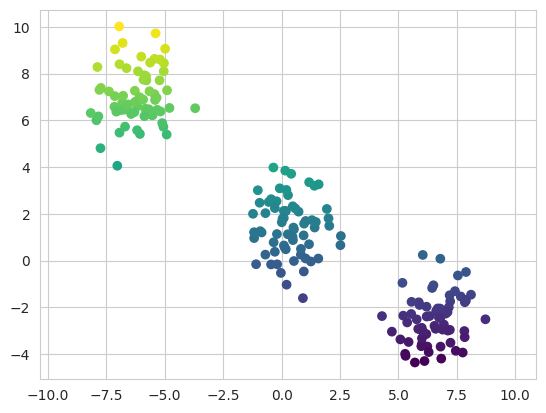

In [2]:
# Crear datos sintéticos
x, _ = make_blobs(n_samples=200, n_features=2)

# Parametros de los gráficos
sns.set_style("whitegrid", {'axes.grid' : False})
cmap = sns.color_palette("viridis", as_cmap=True)

# Dibujar puntos
plt.scatter(x[:,0], x[:,1], c=x[:,1], cmap=cmap)
plt.axis('equal')
plt.grid()

**Escaladores**

Standard Scaler

Scaler parameters:  [0.24079221 1.98956355] [27.92729886 16.70720061]


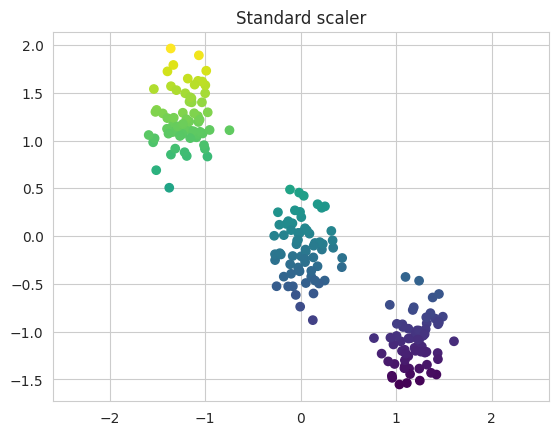

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
print('Scaler parameters: ', scaler.mean_, scaler.var_)
new_x = scaler.transform(x)
plt.scatter(new_x[:,0], new_x[:,1], c=x[:,1], cmap=cmap)
plt.title('Standard scaler')
plt.axis('equal')
plt.grid()

Scaler parameters:  [ 8.72160321 10.01740446] [-8.16599068 -4.3597029 ]


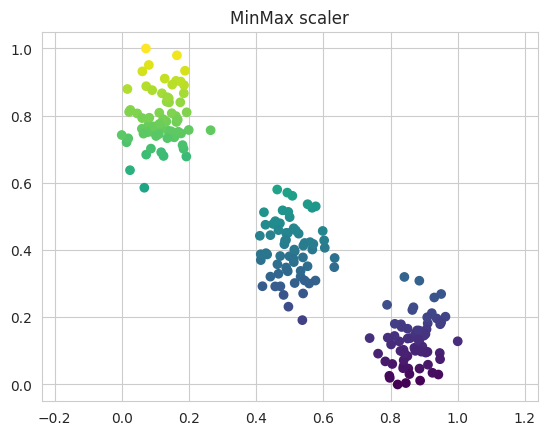

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)
print('Scaler parameters: ', scaler.data_max_, scaler.data_min_)
new_x = scaler.transform(x)
plt.scatter(new_x[:,0], new_x[:,1], c=x[:,1], cmap=cmap)
plt.title('MinMax scaler')
plt.axis('equal')
plt.grid()

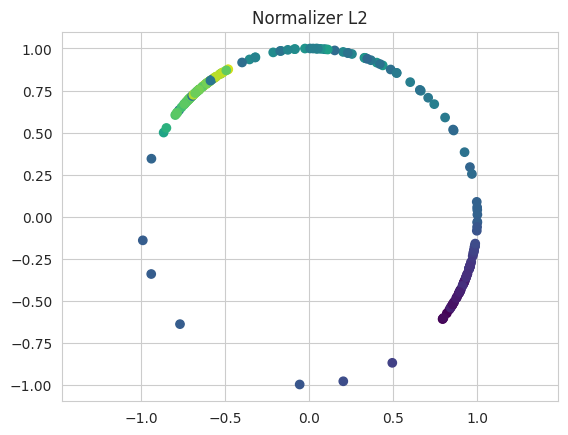

In [5]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='l2')
scaler.fit(x)

new_x = scaler.transform(x)
plt.scatter(new_x[:,0], new_x[:,1], c=x[:,1], cmap=cmap)
plt.title('Normalizer L2')
plt.axis('equal')
plt.grid()

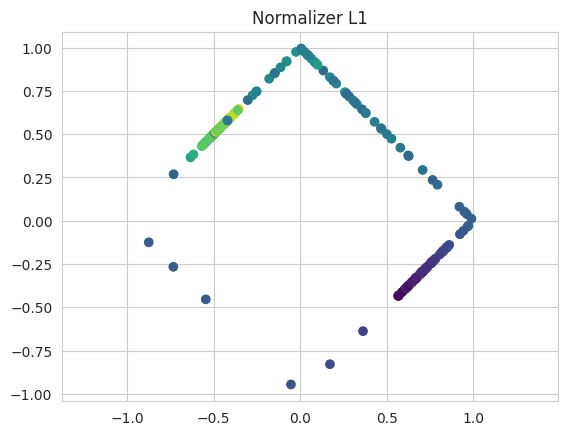

In [6]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='l1')
scaler.fit(x)

new_x = scaler.transform(x)
plt.scatter(new_x[:,0], new_x[:,1], c=x[:,1], cmap=cmap)
plt.title('Normalizer L1')
plt.axis('equal')
plt.grid()

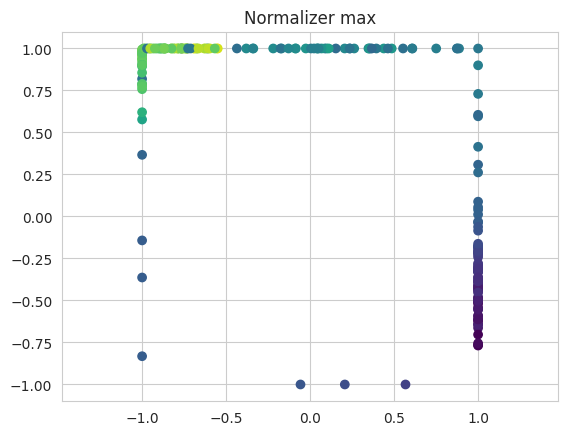

In [7]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='max')
scaler.fit(x)

new_x = scaler.transform(x)
plt.scatter(new_x[:,0], new_x[:,1], c=x[:,1], cmap=cmap)
plt.title('Normalizer max')
plt.axis('equal')
plt.grid()

**Codificación**

In [8]:
# Label enconding
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame({'color': ['red', 'green', 'blue', 'red', 'green']})
le = LabelEncoder()
df['color_label'] = le.fit_transform(df['color'])

print(df)

   color  color_label
0    red            2
1  green            1
2   blue            0
3    red            2
4  green            1


In [9]:
# Ordinal Encoding:
df = pd.DataFrame({'quality': ['low', 'medium', 'high', 'medium']})
quality_map = {'low': 0, 'medium': 1, 'high': 2}
df['quality_map'] = df['quality'].map(quality_map)
print(df)

  quality  quality_map
0     low            0
1  medium            1
2    high            2
3  medium            1


In [11]:
# Ordinal encoding width sklearn
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder().fit(df)
coded = enc.transform(df)
print(enc.categories_)
print(coded)

[array(['high', 'low', 'medium'], dtype=object), array([0, 1, 2])]
[[1. 0.]
 [2. 1.]
 [0. 2.]
 [2. 1.]]


In [12]:
# One-Hot Encoding with pandas
df = pd.DataFrame({'color': ['red', 'green', 'blue', 'red']})
one_hot = pd.get_dummies(df['color'])
print(one_hot)

    blue  green    red
0  False  False   True
1  False   True  False
2   True  False  False
3  False  False   True


In [13]:
# One-Hot Encoding with sklearn
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df)
print(enc.categories_)
enc.transform(df).toarray()

[array(['blue', 'green', 'red'], dtype=object)]


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [14]:
# Dummy variables
data = {'Color': ['Red', 'Green', 'Blue', 'Red', 'Blue']}
df = pd.DataFrame(data)
dummy_df = pd.get_dummies(df['Color'], drop_first=True, prefix='Color')
print(dummy_df)

   Color_Green  Color_Red
0        False       True
1         True      False
2        False      False
3        False       True
4        False      False


In [15]:
# Dummy variables with sklearn
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(df)
dummy = encoder.transform(df)
print(encoder.categories_)
print(dummy.toarray())

[array(['Blue', 'Green', 'Red'], dtype=object)]
[[0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]]


**Codificación inversa**

In [16]:
encoder.inverse_transform(np.array([[0, 1]]))

array([['Red']], dtype=object)

**Guardar modelos**

In [17]:
import pickle

# Guardar modelo
pickle.dump(encoder, open('encoder.sav', 'wb'))

# borramos el modelo de la RAM
del encoder

In [19]:
encoder = pickle.load(open('encoder.sav', 'rb'))
encoder.inverse_transform(np.array([[0, 1]]))

array([['Red']], dtype=object)